<a href="https://colab.research.google.com/github/jahnavvivi/FullStack-Recipe-Finder-Project/blob/main/RecipeFinderDataRefining1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install pandas sentence-transformers gradio googletrans==4.0.0-rc1 --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 3.8 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of gradio to determine which version is compatible with other requirements. This could take a while.
  Using cached gradio-5.49.0-py3-none-any.whl.metadata (16 kB)
  Using cached gradio-5.48.0-py3-none-any.whl.metadata (16 kB)
  Using cached gradio-5.47.2-py3-none-any.whl.metadata (16 kB)
  Using cached gradio-5.47.1-py3-none-any.whl.metadata (16 kB)
  Using cached gradio_client-1.13.2-py3-none-any.whl.metadata (7.1 kB)
  Using cached gradio-5.47.0-py3-none-any.whl.metadata (16 kB)
  Using cached gradio-5.46.1-py3-none-any.whl.metadata (16 kB)
  Using cached gradio_client-1.13.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached gradio-5.46.0-py3-none-any.whl.metadata (16 kB)
  Using cached gradio_client-1.13.0-py3-none-any.whl.metadata (7.1 kB)
INFO: pip is still looking at multiple versions of gradio to determine which version is compatible with other requirements.

In [12]:
import numpy as np
import pandas as pd
from sentence_transformers import SentenceTransformer, util
from googletrans import Translator
import gradio as gr
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [37]:
df = pd.read_csv('/content/drive/My Drive/IndianFoodDatasetCSV.csv')
display(df.head())

,Srno,RecipeName,TranslatedRecipeName,Ingredients,TranslatedIngredients,PrepTimeInMins,CookTimeInMins,TotalTimeInMins,Servings,Cuisine,Course,Diet,Instructions,TranslatedInstructions,URL
0,1,Masala Karela Recipe,Masala Karela Recipe,"6 Karela (Bitter Gourd/ Pavakkai) - deseeded,S...","6 Karela (Bitter Gourd/ Pavakkai) - deseeded,S...",15,30,45,6,Indian,Side Dish,Diabetic Friendly,"To begin making the Masala Karela Recipe,de-se...","To begin making the Masala Karela Recipe,de-se...",https://www.archanaskitchen.com/masala-karela-...
1,2,टमाटर पुलियोगरे रेसिपी - Spicy Tomato Rice (Re...,Spicy Tomato Rice (Recipe),"2-1/2 कप चावल - पका ले,3 टमाटर,3 छोटा चमच्च बी...","2-1 / 2 cups rice - cooked, 3 tomatoes, 3 teas...",5,10,15,3,South Indian Recipes,Main Course,Vegetarian,टमाटर पुलियोगरे बनाने के लिए सबसे पहले टमाटर क...,"To make tomato puliogere, first cut the tomato...",http://www.archanaskitchen.com/spicy-tomato-ri...
2,3,Ragi Semiya Upma Recipe - Ragi Millet Vermicel...,Ragi Semiya Upma Recipe - Ragi Millet Vermicel...,"1-1/2 cups Rice Vermicelli Noodles (Thin),1 On...","1-1/2 cups Rice Vermicelli Noodles (Thin),1 On...",20,30,50,4,South Indian Recipes,South Indian Breakfast,High Protein Vegetarian,"To begin making the Ragi Vermicelli Recipe, fi...","To begin making the Ragi Vermicelli Recipe, fi...",http://www.archanaskitchen.com/ragi-vermicelli...
3,4,Gongura Chicken Curry Recipe - Andhra Style Go...,Gongura Chicken Curry Recipe - Andhra Style Go...,"500 grams Chicken,2 Onion - chopped,1 Tomato -...","500 grams Chicken,2 Onion - chopped,1 Tomato -...",15,30,45,4,Andhra,Lunch,Non Vegeterian,To begin making Gongura Chicken Curry Recipe f...,To begin making Gongura Chicken Curry Recipe f...,http://www.archanaskitchen.com/gongura-chicken...
4,5,आंध्रा स्टाइल आलम पचड़ी रेसिपी - Adrak Chutney ...,Andhra Style Alam Pachadi Recipe - Adrak Chutn...,"1 बड़ा चमच्च चना दाल,1 बड़ा चमच्च सफ़ेद उरद दाल,2...","1 tablespoon chana dal, 1 tablespoon white ura...",10,20,30,4,Andhra,South Indian Breakfast,Vegetarian,आंध्रा स्टाइल आलम पचड़ी बनाने के लिए सबसे पहले ...,"To make Andhra Style Alam Pachadi, first heat ...",https://www.archanaskitchen.com/andhra-style-a...


In [38]:
df.shape

(6871, 15)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6871 entries, 0 to 6870
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Srno                    6871 non-null   int64 
 1   RecipeName              6871 non-null   object
 2   TranslatedRecipeName    6871 non-null   object
 3   Ingredients             6865 non-null   object
 4   TranslatedIngredients   6865 non-null   object
 5   PrepTimeInMins          6871 non-null   int64 
 6   CookTimeInMins          6871 non-null   int64 
 7   TotalTimeInMins         6871 non-null   int64 
 8   Servings                6871 non-null   int64 
 9   Cuisine                 6871 non-null   object
 10  Course                  6871 non-null   object
 11  Diet                    6871 non-null   object
 12  Instructions            6871 non-null   object
 13  TranslatedInstructions  6871 non-null   object
 14  URL                     6871 non-null   object
dtypes: i

In [40]:
df.columns

Index(['Srno', 'RecipeName', 'TranslatedRecipeName', 'Ingredients',
       'TranslatedIngredients', 'PrepTimeInMins', 'CookTimeInMins',
       'TotalTimeInMins', 'Servings', 'Cuisine', 'Course', 'Diet',
       'Instructions', 'TranslatedInstructions', 'URL'],
      dtype='object')

In [41]:
columns_to_drop = ['Srno', 'TranslatedRecipeName', 'TranslatedIngredients', 'TranslatedInstructions']
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]

if existing_columns_to_drop:
  print(f"\nDropping unnecessary columns: {existing_columns_to_drop}...")
  df = df.drop(columns=existing_columns_to_drop)
else:
  print("\nNo unnecessary columns to drop (or they were already removed).")


Dropping unnecessary columns: ['Srno', 'TranslatedRecipeName', 'TranslatedIngredients', 'TranslatedInstructions']...


In [42]:
df.shape

(6871, 11)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6871 entries, 0 to 6870
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   RecipeName       6871 non-null   object
 1   Ingredients      6865 non-null   object
 2   PrepTimeInMins   6871 non-null   int64 
 3   CookTimeInMins   6871 non-null   int64 
 4   TotalTimeInMins  6871 non-null   int64 
 5   Servings         6871 non-null   int64 
 6   Cuisine          6871 non-null   object
 7   Course           6871 non-null   object
 8   Diet             6871 non-null   object
 9   Instructions     6871 non-null   object
 10  URL              6871 non-null   object
dtypes: int64(4), object(7)
memory usage: 590.6+ KB


In [44]:
if 'RecipeName' in df.columns:
  print(f"\nInitial row count: {len(df)}")
  duplicate_count = df.duplicated(subset=['RecipeName']).sum()
  print(f"Found {duplicate_count} duplicate recipes based on 'RecipeName'. Removing them...")
  df = df.drop_duplicates(subset=['RecipeName'], keep='first')
  print(f"Row count after removing duplicates: {len(df)}")
else:
  print("\nWarning: 'RecipeName' column not found. Skipping duplicate removal step.")


Initial row count: 6871
Found 0 duplicate recipes based on 'RecipeName'. Removing them...
Row count after removing duplicates: 6871


In [45]:
df.isnull().sum()

,0
RecipeName,0
Ingredients,6
PrepTimeInMins,0
CookTimeInMins,0
TotalTimeInMins,0
Servings,0
Cuisine,0
Course,0
Diet,0
Instructions,0


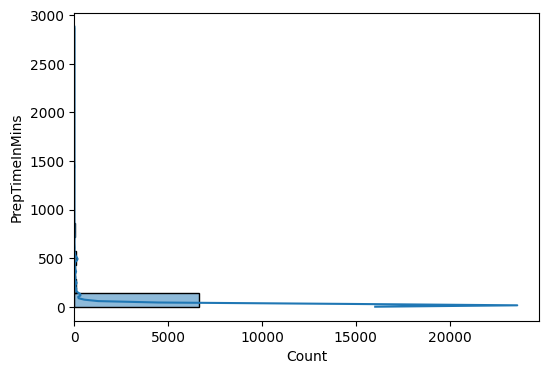

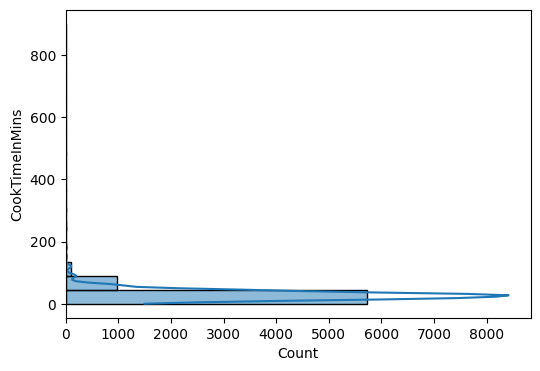

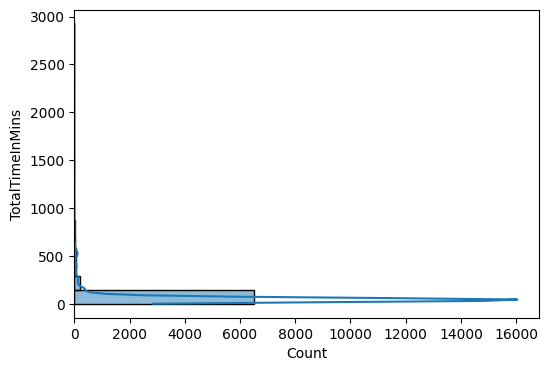

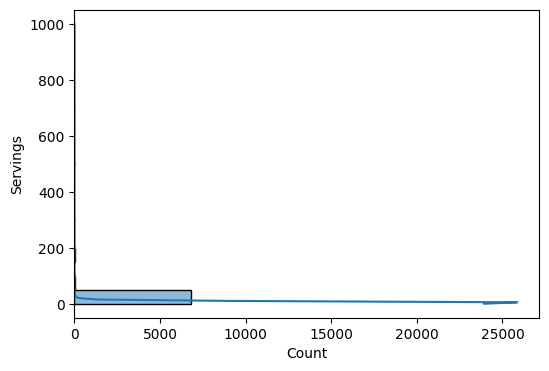

In [46]:
numeric_cols = ['PrepTimeInMins', 'CookTimeInMins', 'TotalTimeInMins', 'Servings']
existing_numeric_cols = [col for col in numeric_cols if col in df.columns]

for col in existing_numeric_cols:
  plt.figure(figsize=(6,4))
  sns.histplot(y=df[col],kde=True, bins=20)

In [47]:
if existing_numeric_cols:
  for col in existing_numeric_cols:
    if df[col].isnull().any():
      median_val = df[col].median()
      if col in ['Servings'] and not pd.isna(median_val):
        median_val = int(median_val)
      elif not pd.isna(median_val):
        pass
      if pd.isna(median_val):
        median_val = 0

      df[col] = df[col].fillna(median_val)
      print(f"Imputed missing values in '{col}' with median: {median_val}")

In [48]:
initial_row_count = len(df)

indices_to_drop = df[df['TotalTimeInMins'] == 0].index
rows_to_drop_count = len(indices_to_drop)
if rows_to_drop_count > 0:
        print(f"Found {rows_to_drop_count} rows to drop.")
        df.drop(indices_to_drop, inplace=True)
else:
        print("No rows found where 'TotalTimeInMins' is 0. No changes needed.")

Found 3 rows to drop.


In [49]:
df.shape

(6868, 11)

In [50]:
df.isnull().sum()

,0
RecipeName,0
Ingredients,6
PrepTimeInMins,0
CookTimeInMins,0
TotalTimeInMins,0
Servings,0
Cuisine,0
Course,0
Diet,0
Instructions,0


In [51]:
print("\n--- Dropping rows with null 'Ingredients' ---")
rows_before_drop = len(df)

df.dropna(subset=['Ingredients'], inplace=True)
rows_dropped_null_ingredients = rows_before_drop - len(df)
print(f"Dropped {rows_dropped_null_ingredients} rows where 'Ingredients' was null.")
print(f"Row count is now: {len(df)}")


--- Dropping rows with null 'Ingredients' ---
Dropped 6 rows where 'Ingredients' was null.
Row count is now: 6862


In [52]:
df.shape

(6862, 11)

In [53]:
df.isnull().sum()

,0
RecipeName,0
Ingredients,0
PrepTimeInMins,0
CookTimeInMins,0
TotalTimeInMins,0
Servings,0
Cuisine,0
Course,0
Diet,0
Instructions,0


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6862 entries, 0 to 6870
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   RecipeName       6862 non-null   object
 1   Ingredients      6862 non-null   object
 2   PrepTimeInMins   6862 non-null   int64 
 3   CookTimeInMins   6862 non-null   int64 
 4   TotalTimeInMins  6862 non-null   int64 
 5   Servings         6862 non-null   int64 
 6   Cuisine          6862 non-null   object
 7   Course           6862 non-null   object
 8   Diet             6862 non-null   object
 9   Instructions     6862 non-null   object
 10  URL              6862 non-null   object
dtypes: int64(4), object(7)
memory usage: 643.3+ KB


In [55]:
output_drive_path = '/content/drive/My Drive/refined_indian_food_dataset.csv'
df.to_csv(output_drive_path, index=False)